# The T-test

In this notebook, we look at the statistical t-test to determine if the average of a parameter is different across 2 populations.

To illustrate the t-test, we're going to work on the school dataset and compare the average weight and height of girls and boys.

We import the necessary packages and load the dataset into a dataframe.



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format


df = pd.read_csv('./data/school.csv')

The school dataset has the height, weight and age of 126 boys and 111 girls.

Note: the original school dataset is based on the imperial system (inches and pounds). 

Our version of this dataset has been converted to the metric system (cm and kg).

In [11]:
df.shape

(237, 4)

In [12]:
df.head()

,sex,age,height,weight
0,m,147,128.27,35.83
1,f,143,130.30,22.91
2,f,147,130.81,29.03
3,m,149,133.35,36.74
4,f,139,134.11,28.80


In [13]:
df.sex.value_counts()

m    126
f    111
Name: sex, dtype: int64

Let's calculate the average of the height for girls and for boys.

In [16]:
print("Average height by sex")
df.groupby(by = 'sex').mean()['height']

Average height by sex


sex
f   153.74
m   157.74
Name: height, dtype: float64

On average girls are 153 cms tall and boys are 157cm tall

Now the question is whether or not this difference is **statistically significant**.

Can we conclude with some certainty based on these observations
that boys are taller than girls?

Before running the t-test,
it's interesting to compare the histograms of the heights for both populations

For that we use the seaborn library


In [17]:
import seaborn as sns


We get the heights values for the 2 populations

In [18]:
G = df[df.sex == 'f'].height.values
B = df[df.sex == 'm'].height.values


and plot the distribution plots

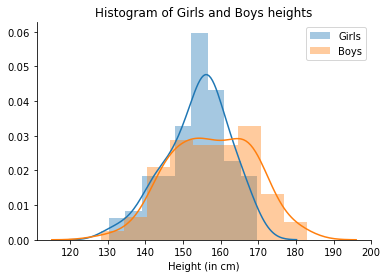

In [19]:
sns.distplot(G, label ='Girls')
sns.distplot(B, label = 'Boys')
plt.legend()
plt.title('Histogram of Girls and Boys heights')
plt.xlabel('Height (in cm)')
sns.despine()


Looking at the histograms, the difference in height between the 2 population is not that obvious.

Let's now load the stats module from the scipy library, and run the t-test on the 2 populations:


In [20]:
from scipy import stats
result = stats.ttest_ind(G,B)
print(result)


Ttest_indResult(statistic=-3.127216049757464, pvalue=0.0019873593355122674)


Recall that the null hypothesis of the t-test is that both populations have the same average.

In our example above, the p-value is much lower than the usual 0.05 threshold. 

So we can reject the null hypothesis


Since we reject the null hypothesis, we can conclude that the difference in average heights, that we have  observed between boys and girls **is statistically significant**.


## weights

Let's now carry out the same test on the weight of the 2 populations

We have the following averages


In [21]:
df.groupby(by = 'sex').mean()['weight']

sex
f   44.85
m   46.92
Name: weight, dtype: float64

so 44.9 kg for girls and 46.9 for boys.
An average difference of 2 kilos.


Let's plot the histograms of the weight for the 2 populations



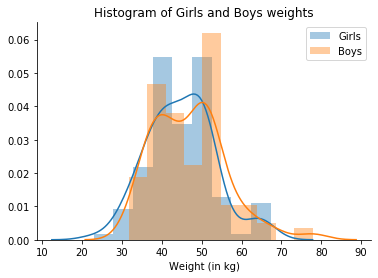

In [22]:
G = df[df.sex == 'f'].weight.values
B = df[df.sex == 'm'].weight.values

sns.distplot(G, label ='Girls')
sns.distplot(B, label = 'Boys')
plt.legend()
plt.title('Histogram of Girls and Boys weights')
plt.xlabel('Weight (in kg)')
sns.despine()


It looks like the weight distribution is quite similar for boys and girls.

Let's confirm that with a t-test


In [24]:
result = stats.ttest_ind(G,B)
print(result)


Ttest_indResult(statistic=-1.8145945910513834, pvalue=0.07086126050383235)


And indeed in this case the p-value equals 0.07
which is above the 0.05 threshold

and
this time we **cannot** reject the null hypothesis

Therefore the observed difference
between the weight of girls and boys **is not statistically significant.**
